In [47]:
cd /tf/classifier

/tf/classifier


In [205]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
from core.data import create_dataset, load_records, standardize

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [178]:
lcs_folder = './data/raw_data/ztf/LCs'
metadata_path = './data/raw_data/ztf/ztf_metadata.dat'
outdir = './data/records/ztf/'

In [179]:
metadata = pd.read_csv(metadata_path)
metadata = metadata.replace({'EB/EW':'EB&EW', 'CV/Nova':'CV&Nova'})

In [183]:
create_dataset(metadata, source=lcs_folder, 
               target=outdir, subsets_frac=(0.5, 0.25), 
               max_lcs_per_record=20000)

100%|██████████| 12/12 [00:03<00:00,  3.91it/s]


In [222]:
dataset = load_records(outdir+'/train', 10, max_obs=50, repeat=1)

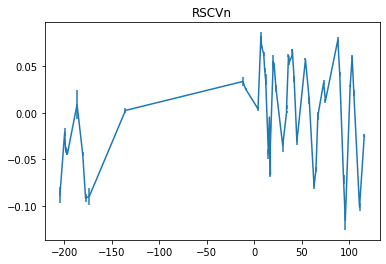

In [224]:
for batch in dataset:    
    lc_sample = batch['values'][0]
    mask_sample = batch['mask'][0][...,0]
    
    lab = list(metadata['Class'].unique())[batch['label'][0]]
    
    x = tf.boolean_mask(lc_sample, mask_sample)
    
    plt.errorbar(x[:, 0], x[:, 1], yerr=x[:, 2])
    plt.title(lab)
    break